In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [12]:
fashion_mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [13]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

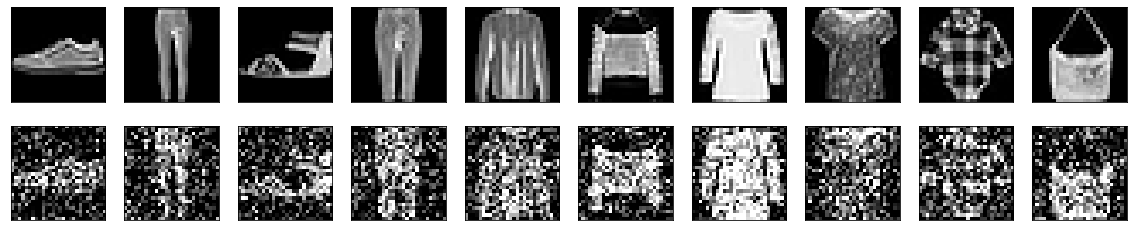

In [16]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = tf.keras.datasets.fashion_mnist.load_data()
# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

# BUILD THE AUTOENCODER

In [17]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [18]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 93s 190ms/step - loss: 0.3037 - val_loss: 0.2721
Epoch 2/50
469/469 [==============================] - 90s 192ms/step - loss: 0.2663 - val_loss: 0.2650
Epoch 3/50
469/469 [==============================] - 95s 202ms/step - loss: 0.2605 - val_loss: 0.2606
Epoch 4/50
469/469 [==============================] - 93s 199ms/step - loss: 0.2573 - val_loss: 0.2582
Epoch 5/50
469/469 [==============================] - 91s 195ms/step - loss: 0.2555 - val_loss: 0.2568
Epoch 6/50
469/469 [==============================] - 92s 196ms/step - loss: 0.2543 - val_loss: 0.2560
Epoch 7/50
469/469 [==============================] - 93s 198ms/step - loss: 0.2534 - val_loss: 0.2551
Epoch 8/50
469/469 [==============================] - 92s 196ms/step - loss: 0.2528 - val_loss: 0.2545
Epoch 9/50
469/469 [==============================] - 91s 195ms/step - loss: 0.2523 - val_loss: 0.2541
Epoch 10/50
469/469 [==============================] - 92s 197ms/step - l

313/313 [==============================] - 8s 23ms/step


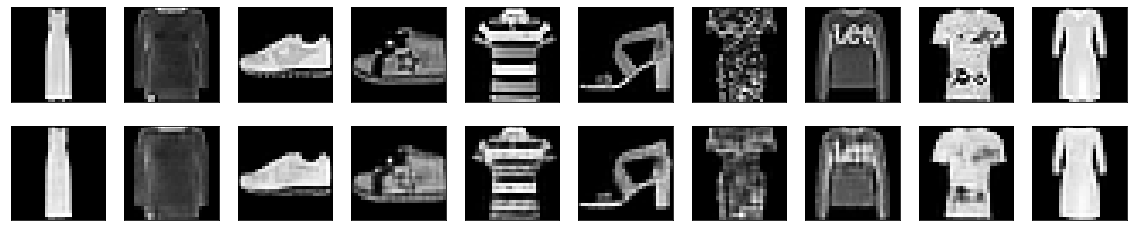

In [19]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

313/313 [==============================] - 9s 29ms/step


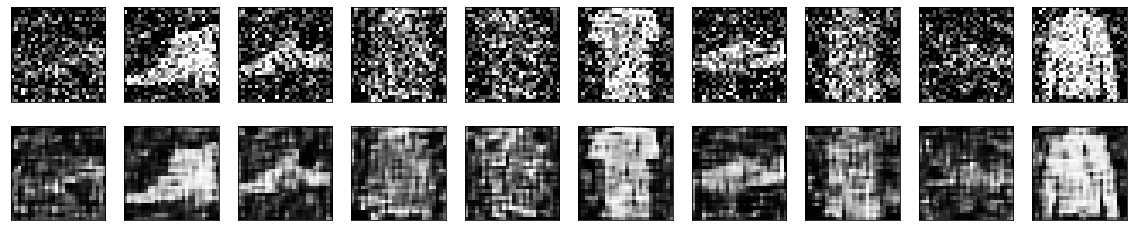

In [20]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

In [22]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=40,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/40
469/469 [==============================] - 100s 214ms/step - loss: 0.2986 - val_loss: 0.2939
Epoch 2/40
469/469 [==============================] - 89s 190ms/step - loss: 0.2901 - val_loss: 0.2910
Epoch 3/40
469/469 [==============================] - 94s 199ms/step - loss: 0.2883 - val_loss: 0.2898
Epoch 4/40
469/469 [==============================] - 91s 194ms/step - loss: 0.2872 - val_loss: 0.2890
Epoch 5/40
469/469 [==============================] - 92s 196ms/step - loss: 0.2864 - val_loss: 0.2883
Epoch 6/40
469/469 [==============================] - 95s 203ms/step - loss: 0.2858 - val_loss: 0.2881
Epoch 7/40
469/469 [==============================] - 97s 206ms/step - loss: 0.2853 - val_loss: 0.2874
Epoch 8/40
469/469 [==============================] - 94s 200ms/step - loss: 0.2849 - val_loss: 0.2870
Epoch 9/40
469/469 [==============================] - 92s 197ms/step - loss: 0.2846 - val_loss: 0.2867
Epoch 10/40
469/469 [==============================] - 91s 194ms/step - 

313/313 [==============================] - 5s 14ms/step


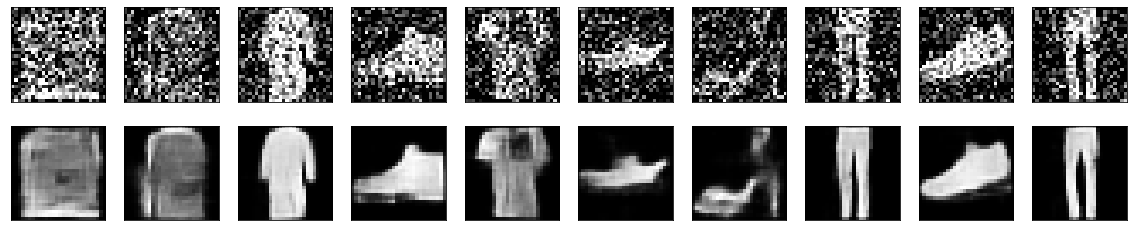

In [23]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)